# A Machine Learning Project for Titanic Survival Prediction

## Md. Islamul Haque Shawon (Roll: 20231086)

### Location Map

In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt

In [2]:
shapefile1 = gpd.read_file('Sank_Point.shp')
shapefile2 = gpd.read_file('World_Countries.shp')

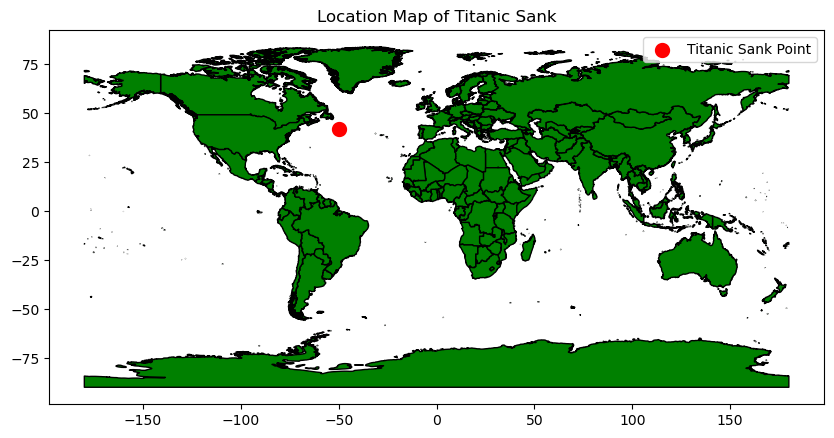

In [3]:
fig, ax = plt.subplots(figsize=(10, 8))

shapefile1.plot(ax=ax, color='red', edgecolor='red', linewidth= 5, alpha=1, label='Titanic Sank Point')
shapefile2.plot(ax=ax, color='green', edgecolor='black', alpha=1)

ax.set_title('Location Map of Titanic Sank')
ax.legend()

plt.show()

### Import libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Loading Data

In [5]:
titanic = pd.read_csv('titanic.csv')
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
1,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
2,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
3,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
4,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,467,0,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.00,NaN,S
887,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.00,NaN,S
888,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.00,NaN,S
889,675,0,2,"Watson, Mr. Ennis Hastings",male,NaN,0,0,239856,0.00,NaN,S


In [6]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          715 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,715.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.839399,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.993128,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.250000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,130.000000,8.000000,6.000000,512.329200


In [8]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            176
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Handling missing values using interpolate method

In [9]:
titanic.drop('Cabin', axis=1, inplace=True)
titanic['Age'].fillna(titanic['Age'].mean(), inplace=True)
titanic["Embarked"].fillna( method ='ffill', limit = 2, inplace = True)
print(titanic.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


<Axes: xlabel='Pclass', ylabel='Age'>

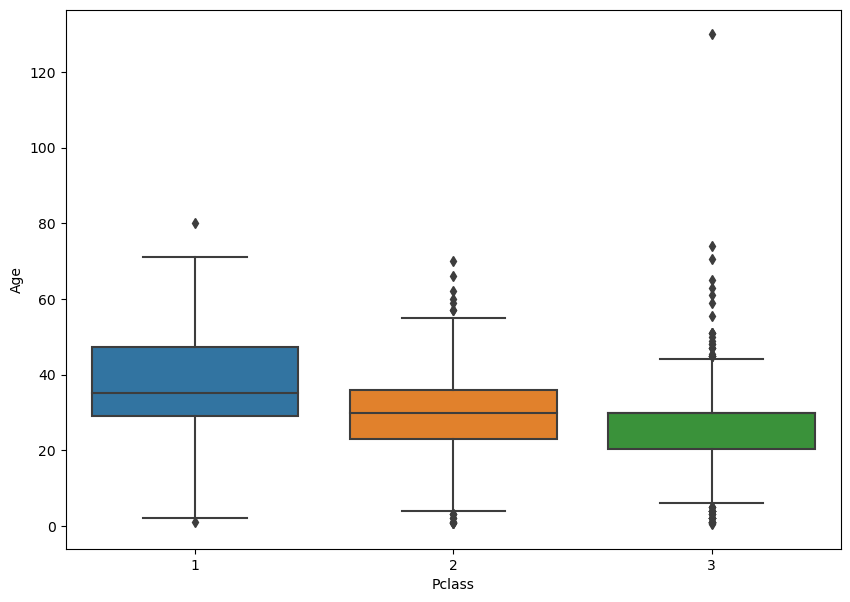

In [10]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Pclass',y='Age',data=titanic)

In [11]:
titanic.groupby('Pclass').mean()['Age'].round()

Pclass
1    37.0
2    30.0
3    27.0
Name: Age, dtype: float64

In [12]:
mean_class1 = titanic.groupby('Pclass').mean()['Age'].round().loc[1]
mean_class2 = titanic.groupby('Pclass').mean()['Age'].round().loc[2]
mean_class3 = titanic.groupby('Pclass').mean()['Age'].round().loc[3]

In [13]:
titanic.loc[titanic['Pclass']==1,'Age'] = titanic.loc[ titanic['Pclass']==1,'Age'].fillna(value=mean_class1)
titanic.loc[titanic['Pclass']==2,'Age'] =  titanic.loc[ titanic['Pclass']==2,'Age'].fillna(value=mean_class2)
titanic.loc[titanic['Pclass']==3,'Age'] =  titanic.loc[ titanic['Pclass']==3,'Age'].fillna(value=mean_class3)

<Axes: ylabel='Age'>

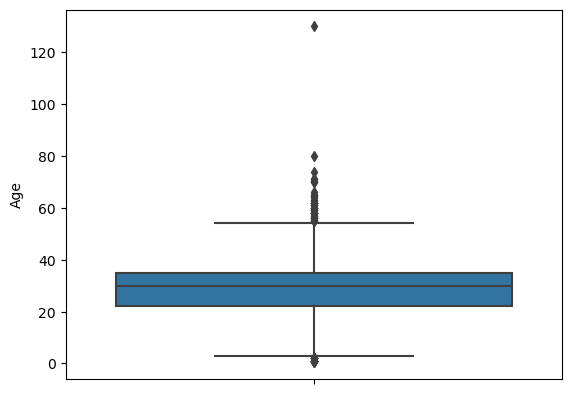

In [14]:
sns.boxplot(y='Age', data=titanic)

### Removing Outlier

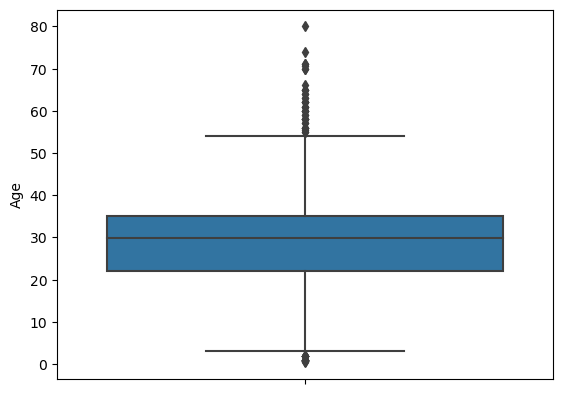

In [15]:
mean_age = titanic['Age'].mean()
df = titanic[titanic['Age'] < 81]
sns.boxplot(y='Age', data=df)
plt.show()

In [16]:
# Calculate the mean age from the 'Age' column
# Create a new DataFrame with rows where age is less than 81.0
# Create a boxplot of the 'Age' column using Seaborn
# Now this boxplot are show the Outlayer has removed

<Axes: ylabel='Survived'>

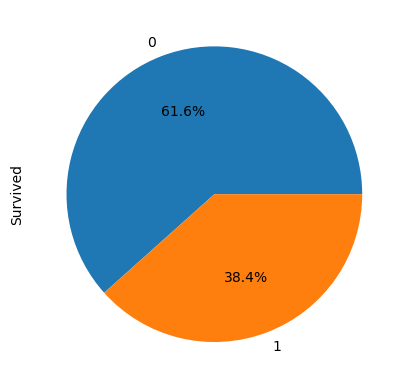

In [17]:
titanic['Survived'].value_counts().plot.pie(autopct = '%1.1f%%')

Pclass  Survived
1       1           136
        0            80
2       0            97
        1            87
3       0           371
        1           119
Name: Survived, dtype: int64


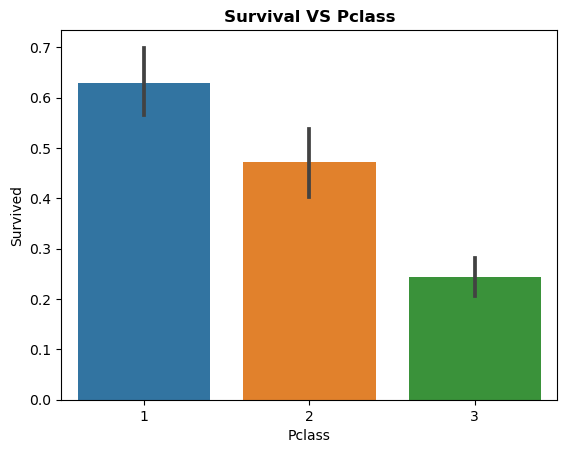

In [18]:
df.Pclass.value_counts()
print(df.groupby('Pclass').Survived.value_counts())
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title('Survival VS Pclass', fontweight = 'bold')
plt.show()

Sex     female  male
Pclass              
1           94   122
2           76   108
3          144   346


Text(0, 0.5, 'Percentage')

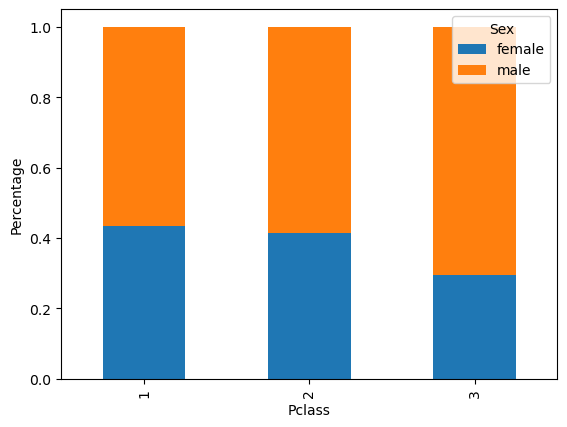

In [19]:
tab = pd.crosstab(df['Pclass'], df['Sex'])
print (tab)
tab.div(tab.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('Pclass')
plt.ylabel('Percentage')

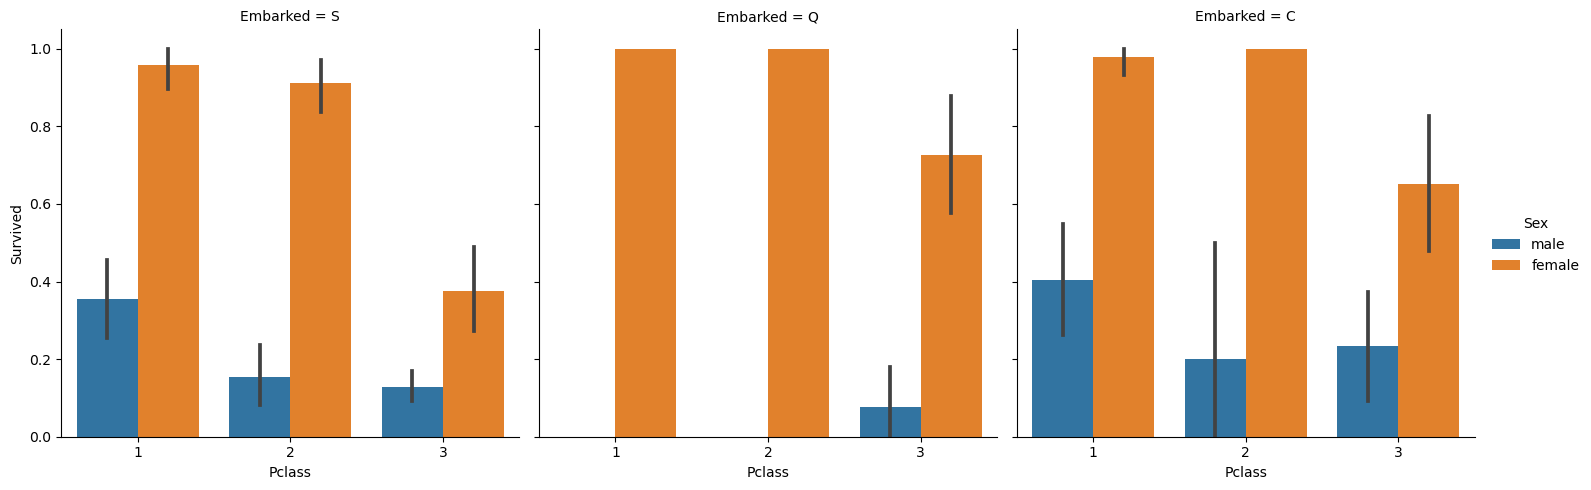

In [20]:
#Survival vs Pclass by Embarked and Sex
g = sns.catplot(x='Pclass', y='Survived', hue='Sex', col='Embarked', data=df, kind='bar')
plt.show()

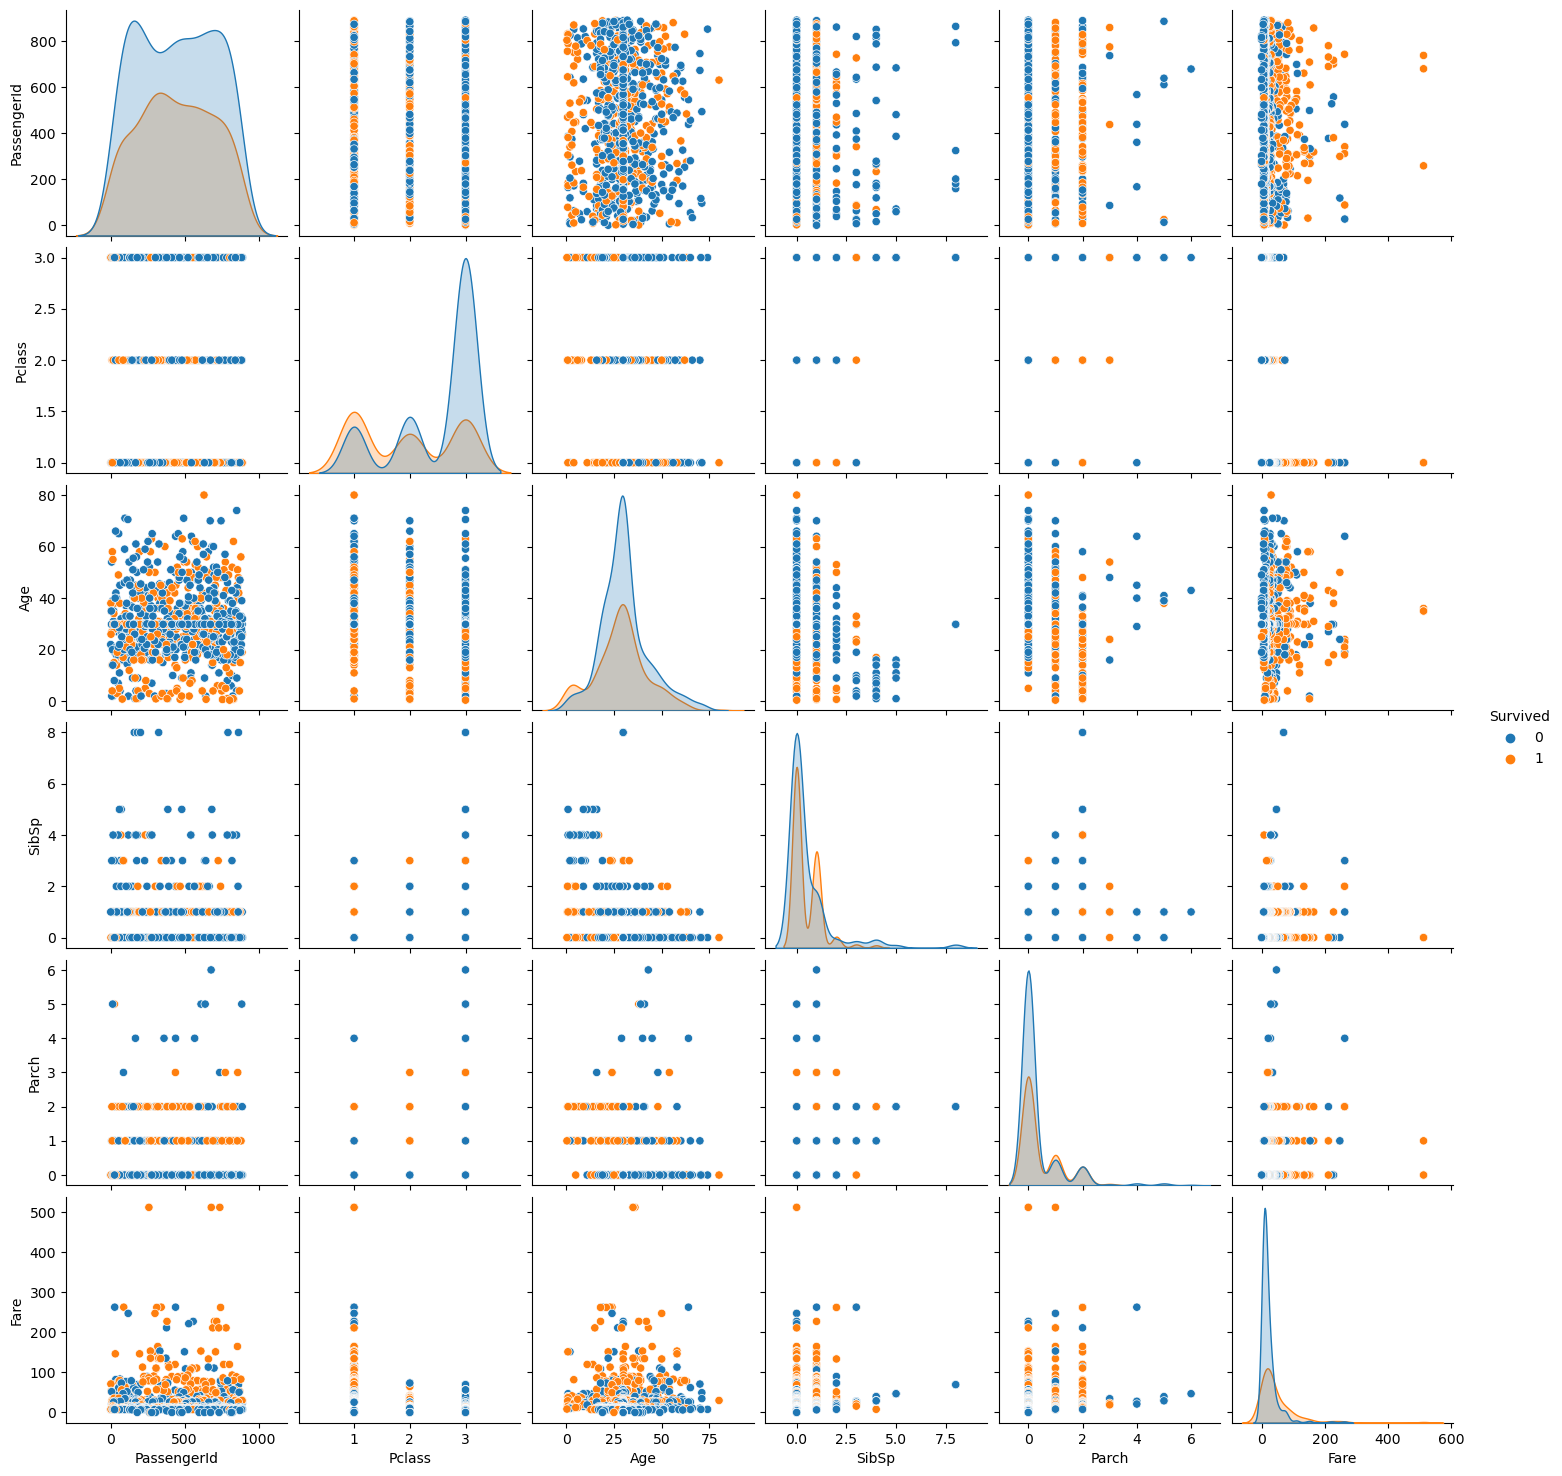

In [21]:
sns.pairplot(df, hue ='Survived')
plt.show()

<Axes: xlabel='Age', ylabel='Density'>

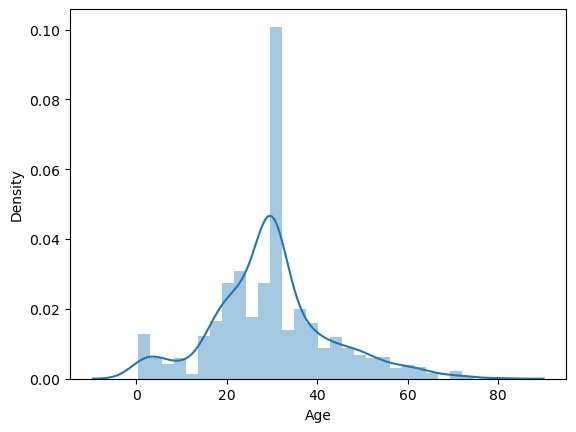

In [22]:
sns.distplot(df['Age'], hist=True)


<Axes: xlabel='Survived', ylabel='Density'>

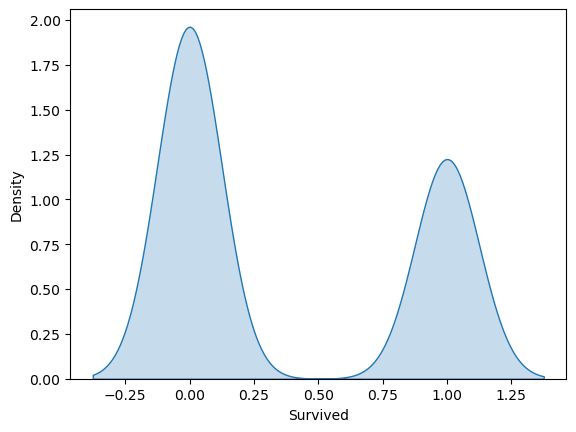

In [23]:
sns.kdeplot(df['Survived'], shade=True)

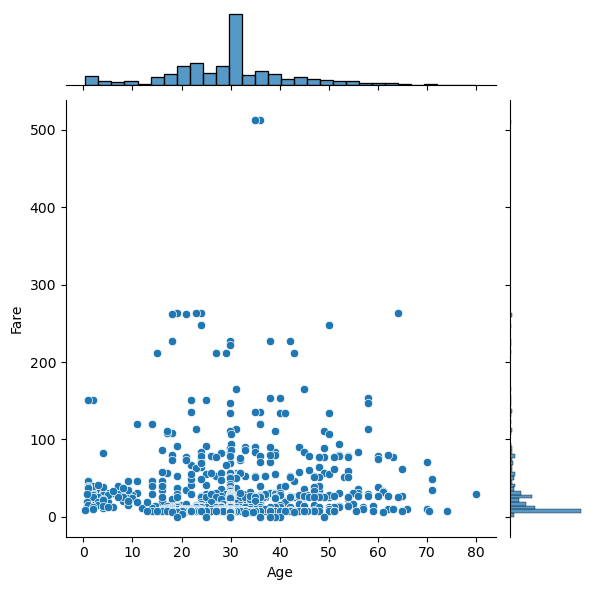

In [24]:
sns.jointplot(x='Age', y='Fare', data=df)

<Axes: xlabel='Survived', ylabel='Density'>

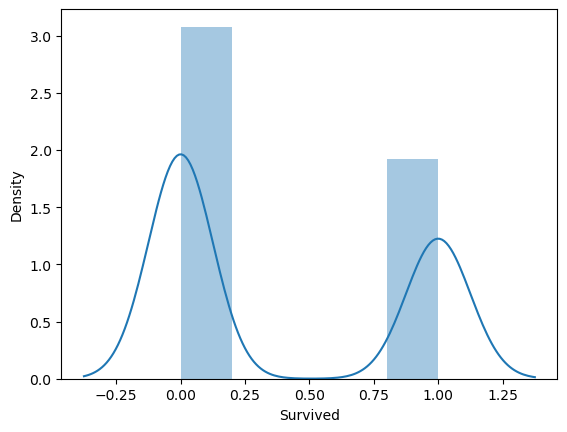

In [25]:
sns.distplot(df['Survived'])

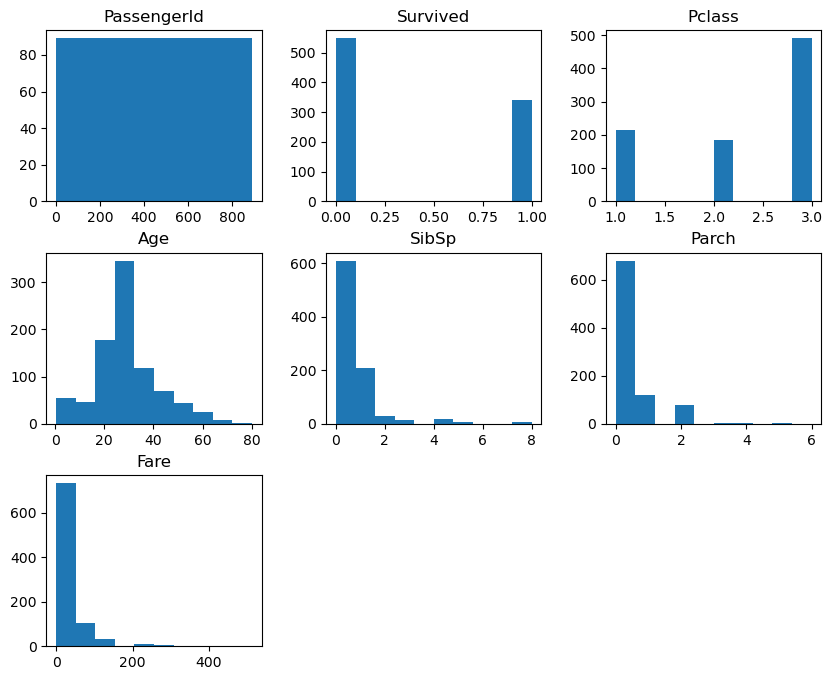

In [26]:
df.hist(bins=10,figsize=(10,8),grid=False);

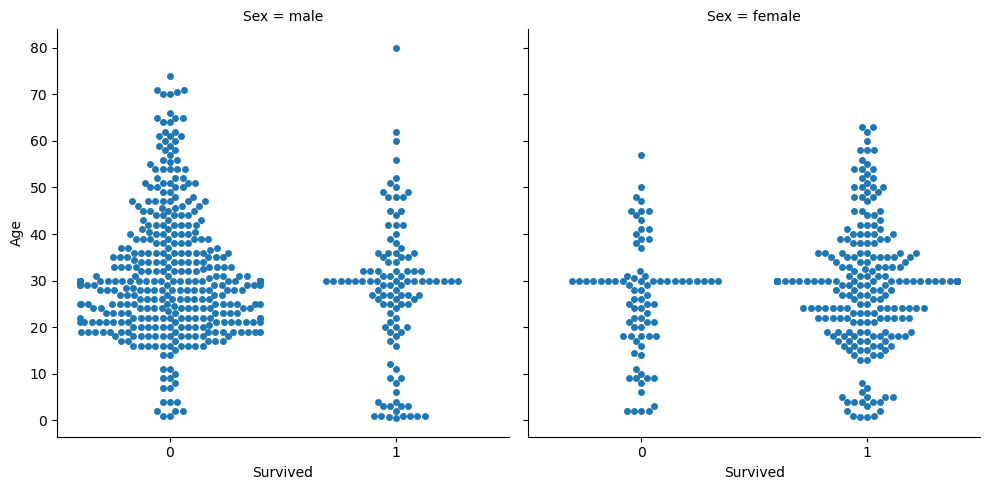

In [27]:
sns.catplot(x='Survived', y='Age', kind='swarm', data=df, col='Sex')

In [28]:
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.003630,-0.036658,0.033150,-0.071376,-0.005190,0.011360
Survived,-0.003630,1.000000,-0.337996,-0.070222,-0.030105,0.083630,0.258146
Pclass,-0.036658,-0.337996,1.000000,-0.330726,0.078870,0.016619,-0.550585
Age,0.033150,-0.070222,-0.330726,1.000000,-0.238865,-0.180152,0.091153
SibSp,-0.071376,-0.030105,0.078870,-0.238865,1.000000,0.411207,0.158111
Parch,-0.005190,0.083630,0.016619,-0.180152,0.411207,1.000000,0.215084
Fare,0.011360,0.258146,-0.550585,0.091153,0.158111,0.215084,1.000000


<Axes: >

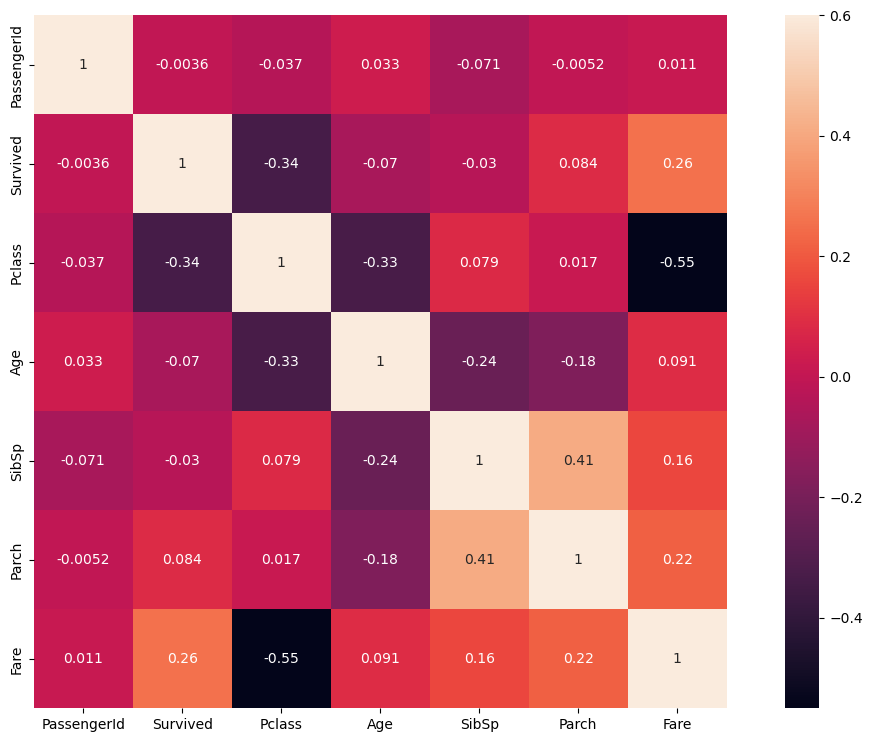

In [29]:
plt.figure(figsize=(15, 9))
sns.heatmap(df.corr(), vmax=0.6, square=True, annot=True)

### encoding categorical variable 

In [30]:
train = df
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,160,0,3,"Sage, Master. Thomas Henry",male,29.839399,8,2,CA. 2343,69.55,S
1,181,0,3,"Sage, Miss. Constance Gladys",female,29.839399,8,2,CA. 2343,69.55,S
2,202,0,3,"Sage, Mr. Frederick",male,29.839399,8,2,CA. 2343,69.55,S
3,325,0,3,"Sage, Mr. George John Jr",male,29.839399,8,2,CA. 2343,69.55,S
4,793,0,3,"Sage, Miss. Stella Anna",female,29.839399,8,2,CA. 2343,69.55,S
...,...,...,...,...,...,...,...,...,...,...,...
886,467,0,2,"Campbell, Mr. William",male,29.839399,0,0,239853,0.00,S
887,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,29.839399,0,0,239854,0.00,S
888,634,0,1,"Parr, Mr. William Henry Marsh",male,29.839399,0,0,112052,0.00,S
889,675,0,2,"Watson, Mr. Ennis Hastings",male,29.839399,0,0,239856,0.00,S


In [31]:
#train.drop('Cabin',axis=1,inplace=True)

In [32]:
train.dropna(inplace=True) # dropping the 1 missing value in Embarked column

I will now convert some of the categorical features in the dataset into dummy variables that our machine learning model can accept.

In [33]:
sex = pd.get_dummies(train['Sex'],drop_first=True)

In [34]:
embark = pd.get_dummies(train['Embarked'],drop_first=True)

In [35]:
train = pd.concat([train,sex,embark],axis=1)

In [36]:
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,160,0,3,"Sage, Master. Thomas Henry",male,29.839399,8,2,CA. 2343,69.55,S,1,0,1
1,181,0,3,"Sage, Miss. Constance Gladys",female,29.839399,8,2,CA. 2343,69.55,S,0,0,1


In [37]:
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [38]:
train.drop('PassengerId',axis=1,inplace=True)

In [39]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,29.839399,8,2,69.55,1,0,1
1,0,3,29.839399,8,2,69.55,0,0,1
2,0,3,29.839399,8,2,69.55,1,0,1
3,0,3,29.839399,8,2,69.55,1,0,1
4,0,3,29.839399,8,2,69.55,0,0,1


Now lets perform similar data cleaning on the test data.

In [40]:
test = pd.read_csv('titanic_test.csv')
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [41]:
test.drop('Cabin',axis=1,inplace=True)

In [42]:
test.dropna(inplace=True)

In [43]:
sex = pd.get_dummies(test['Sex'],drop_first=True)
embark = pd.get_dummies(test['Embarked'],drop_first=True)

In [44]:
test = pd.concat([test,sex,embark],axis=1)

In [45]:
test.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [46]:
test.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,892,3,34.5,0,0,7.8292,1,1,0
1,893,3,47.0,1,0,7.0000,0,0,1
2,894,2,62.0,0,0,9.6875,1,1,0
3,895,3,27.0,0,0,8.6625,1,0,1
4,896,3,22.0,1,1,12.2875,0,0,1


### Model Training

In [47]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [48]:
X = train.drop(columns=['Survived'], axis=1)
y = train['Survived']

In [49]:
from sklearn.model_selection import train_test_split, cross_val_score
# classify column
def classify(model):
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
    model.fit(x_train, y_train)
    print('Accuracy:', model.score(x_test, y_test))
    
    score = cross_val_score(model, X, y, cv=5)
    print('CV Score:', np.mean(score))

In [50]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
classify(model)

Accuracy: 0.39092081347839625
CV Score: 0.3114822250605239


In [51]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
classify(model)

Accuracy: 0.7937219730941704
CV Score: 0.7292134831460675


In [52]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
classify(model)

Accuracy: 0.7982062780269058
CV Score: 0.42359550561797754


In [53]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
classify(model)

Accuracy: 0.8116591928251121
CV Score: 0.4393258426966292


In [54]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
classify(model)

Accuracy: 0.8161434977578476
CV Score: 0.5179775280898876


### Complete Model Training with Full Data

In [55]:
# test = pd.read_csv('test.csv')
# encode = ['Sex', 'Embarked']
# label = LabelEncoder()
# test[encode] = test[encode].apply(label.fit_transform)
# test.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
# test

In [56]:
X = train.drop('Survived',axis=1)
y = train['Survived']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
logmodel.score(X_train,y_train)
logmodel.score(X_test,y_test)

0.7790262172284644

In [57]:
X = train.drop('Survived',axis=1)
y = train['Survived']

In [58]:
from sklearn.model_selection import train_test_split

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [60]:
from sklearn.linear_model import LogisticRegression

In [61]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression()

In [62]:
logmodel.score(X_train,y_train)

0.8105939004815409

In [63]:
logmodel.score(X_test,y_test)

0.7790262172284644

## Making Predictions

In [64]:
test_x = test.drop('PassengerId',axis=1)

In [65]:
predictions = logmodel.predict(test_x)

In [66]:
final_prediction = pd.DataFrame({'PassengerId':test['PassengerId'],'Survived':predictions})

In [67]:
final_prediction.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [68]:
final_prediction.to_csv('Prediction.csv')